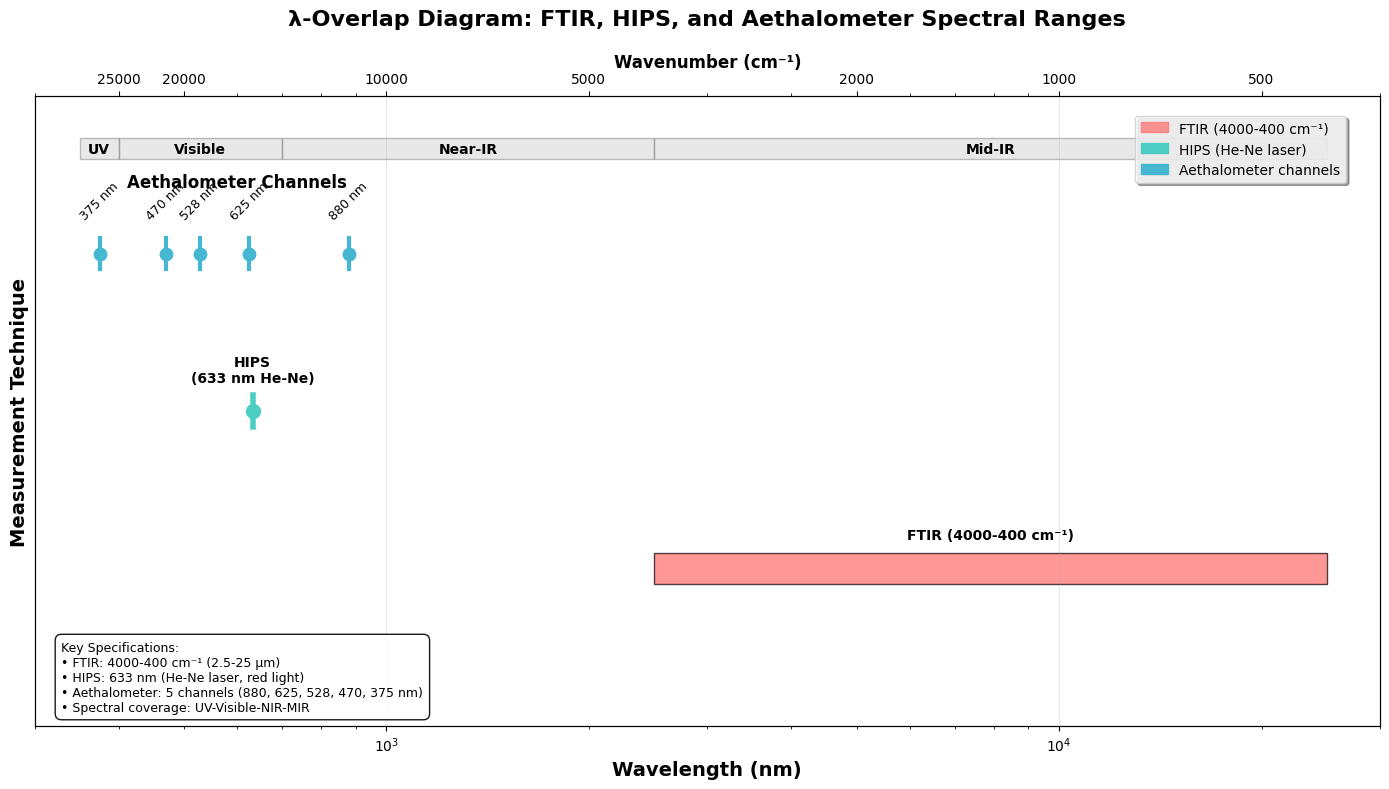

Spectral Range Analysis:
FTIR (4000-400 cm⁻¹): 2500 - 25000 nm
HIPS: 633 nm
Aethalometer channels:
  - 880 nm
  - 625 nm
  - 528 nm
  - 470 nm
  - 375 nm

Overlap Analysis:
------------------------------
✗ HIPS (633 nm) does NOT overlap with FTIR (4000-400 cm⁻¹)
Aethalometer channels in FTIR range: []
All instruments cover complementary spectral regions for comprehensive aerosol analysis


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Define wavelength ranges and convert units as needed
# FTIR: 4000-400 cm⁻¹ (convert to nm: λ(nm) = 10^7 / wavenumber(cm⁻¹))
ftir_wn_min, ftir_wn_max = 400, 4000  # cm⁻¹
ftir_wl_min = 1e7 / ftir_wn_max  # nm (2500 nm)
ftir_wl_max = 1e7 / ftir_wn_min   # nm (25000 nm)

# Alternative FTIR range: 4000-660 cm⁻¹
ftir_alt_wn_min, ftir_alt_wn_max = 660, 4000  # cm⁻¹
ftir_alt_wl_min = 1e7 / ftir_alt_wn_max  # nm (2500 nm)
ftir_alt_wl_max = 1e7 / ftir_alt_wn_min   # nm (15151 nm)

# HIPS: 633 nm (He-Ne laser)
hips_wl = 633  # nm

# Aethalometer channels
aethal_channels = [880, 625, 528, 470, 375]  # nm

# Set up the plot with logarithmic x-axis for better visualization
ax.set_xscale('log')
ax.set_xlim(300, 30000)  # nm range
ax.set_ylim(-0.5, 5.5)

# Colors for different instruments
colors = {
    'ftir': '#FF6B6B',
    'ftir_alt': '#FF9999',
    'hips': '#4ECDC4',
    'aethal': '#45B7D1'
}

# Plot FTIR range (using the broader 4000-400 cm⁻¹ range)
y_ftir = 1
ax.add_patch(Rectangle((ftir_wl_min, y_ftir-0.15), ftir_wl_max-ftir_wl_min, 0.3, 
                      facecolor=colors['ftir'], alpha=0.7, edgecolor='black'))
ax.text(np.sqrt(ftir_wl_min * ftir_wl_max), y_ftir + 0.25, 
        'FTIR (4000-400 cm⁻¹)', ha='center', va='bottom', fontweight='bold')

# Plot HIPS
y_hips = 2.5
ax.plot([hips_wl, hips_wl], [y_hips-0.15, y_hips+0.15], 
        color=colors['hips'], linewidth=4)
ax.scatter([hips_wl], [y_hips], color=colors['hips'], s=100, zorder=5)
ax.text(hips_wl, y_hips + 0.25, 'HIPS\n(633 nm He-Ne)', 
        ha='center', va='bottom', fontweight='bold')

# Plot Aethalometer channels
y_aethal = 4
for i, wl in enumerate(aethal_channels):
    ax.plot([wl, wl], [y_aethal-0.15, y_aethal+0.15], 
            color=colors['aethal'], linewidth=3)
    ax.scatter([wl], [y_aethal], color=colors['aethal'], s=80, zorder=5)
    ax.text(wl, y_aethal + 0.3, f'{wl} nm', 
            ha='center', va='bottom', fontsize=9, rotation=45)

ax.text(600, y_aethal + 0.6, 'Aethalometer Channels', 
        ha='center', va='bottom', fontweight='bold', fontsize=12)

# Add wavelength regions labels
regions = [
    (350, 400, 'UV'),
    (400, 700, 'Visible'),
    (700, 2500, 'Near-IR'),
    (2500, 25000, 'Mid-IR')
]

y_regions = 5
for start, end, label in regions:
    center = np.sqrt(start * end)
    ax.add_patch(Rectangle((start, y_regions-0.1), end-start, 0.2, 
                          facecolor='lightgray', alpha=0.5, edgecolor='gray'))
    ax.text(center, y_regions, label, ha='center', va='center', 
            fontsize=10, fontweight='bold')

# Customize the plot
ax.set_xlabel('Wavelength (nm)', fontsize=14, fontweight='bold')
ax.set_ylabel('Measurement Technique', fontsize=14, fontweight='bold')
ax.set_title('λ-Overlap Diagram: FTIR, HIPS, and Aethalometer Spectral Ranges', 
             fontsize=16, fontweight='bold', pad=20)

# Remove y-axis ticks and labels
ax.set_yticks([])

# Add grid
ax.grid(True, alpha=0.3, axis='x')

# Add legend with better positioning and transparency
legend_elements = [
    mpatches.Patch(color=colors['ftir'], alpha=0.7, label='FTIR (4000-400 cm⁻¹)'),
    mpatches.Patch(color=colors['hips'], label='HIPS (He-Ne laser)'),
    mpatches.Patch(color=colors['aethal'], label='Aethalometer channels')
]
legend = ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.98), 
                  framealpha=0.8, fancybox=True, shadow=True)

# Add wavenumber axis on top for FTIR reference
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim(300, 30000)

# Convert wavelength ticks to wavenumbers for the top axis
wl_ticks = [400, 500, 1000, 2000, 5000, 10000, 20000]
wn_labels = [f'{int(1e7/wl)}' if 1e7/wl >= 1 else f'{1e7/wl:.1f}' for wl in wl_ticks]
ax2.set_xticks(wl_ticks)
ax2.set_xticklabels(wn_labels)
ax2.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, fontweight='bold')

# Add detailed information box
info_text = """Key Specifications:
• FTIR: 4000-400 cm⁻¹ (2.5-25 μm)
• HIPS: 633 nm (He-Ne laser, red light)
• Aethalometer: 5 channels (880, 625, 528, 470, 375 nm)
• Spectral coverage: UV-Visible-NIR-MIR"""

ax.text(0.02, 0.02, info_text, transform=ax.transAxes, 
        bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.9),
        verticalalignment='bottom', horizontalalignment='left',
        fontsize=9)

plt.tight_layout()
plt.show()

# Additional analysis: Calculate overlaps
print("Spectral Range Analysis:")
print("="*50)
print(f"FTIR (4000-400 cm⁻¹): {ftir_wl_min:.0f} - {ftir_wl_max:.0f} nm")
print(f"HIPS: {hips_wl} nm")
print("Aethalometer channels:")
for wl in aethal_channels:
    print(f"  - {wl} nm")

print("\nOverlap Analysis:")
print("-" * 30)
# Check if HIPS overlaps with FTIR range
if ftir_wl_min <= hips_wl <= ftir_wl_max:
    print(f"✓ HIPS ({hips_wl} nm) overlaps with FTIR (4000-400 cm⁻¹)")
else:
    print(f"✗ HIPS ({hips_wl} nm) does NOT overlap with FTIR (4000-400 cm⁻¹)")

# Check Aethalometer overlaps
aethal_in_ftir = [wl for wl in aethal_channels if ftir_wl_min <= wl <= ftir_wl_max]

print(f"Aethalometer channels in FTIR range: {aethal_in_ftir}")
print(f"All instruments cover complementary spectral regions for comprehensive aerosol analysis")